In [1]:
#!/usr/bin/python
# -*- coding: utf8 -*-

import sys
import os
import time
import struct

''' Add '/Lib' or '/Lib64' to path '''
# if (8 * struct.calcsize("P")) == 32:
#     print("Use x86 libraries.")
#     sys.path.append(os.path.join(os.path.dirname(__file__), 'Lib'))
# else:
#     print("Use x86_64 libraries.")
#     sys.path.append(os.path.join(os.path.dirname(__file__), 'Lib64'))
   
sys.path.append("H:\\MPLCProject\\Lib64\\")
''' Import Alpao SDK class '''
from asdk import DM

In [1]:
column_heights = [5, 7, 9, 9, 9, 9, 9, 7, 5]

In [2]:
import numpy as np
np.sum(column_heights)

69

In [26]:
from Lab_Equipment.Config import config 
import  Lab_Equipment.OpticalSimulations.libs.OpticalOperators as OpticOp
import Lab_Equipment.ZernikeModule.ZernikeModule as zernlib

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def show_deformable_mirror(actuator_values):
    """
    Visualises the deformable mirror actuator heights using imshow.

    Parameters:
    - actuator_values (np.ndarray): 1D array of length 69.
    """
    if len(actuator_values) != 69:
        raise ValueError("Input array must be of length 69.")
    
    column_heights = [5, 7, 9, 9, 9, 9, 9, 7, 5]
    max_height = max(column_heights)
    grid = np.full((max_height, 9), np.nan)

    idx = 0
    for col, height in enumerate(column_heights):
        start_row = (max_height - height) // 2
        grid[start_row:start_row + height, col] = actuator_values[idx:idx + height]
        idx += height

    plt.figure(figsize=(6, 6))
    im = plt.imshow(grid, cmap='viridis', origin='lower')
    plt.title("Deformable Mirror Actuator Heights")
    plt.colorbar(im, label="Height")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.tight_layout()
    plt.show()
    
def grid_to_actuator_array(full_grid):
    """
    Takes a 9x9 full grid and extracts only the actuator values
    according to the known 69-actuator layout.

    Parameters:
    - full_grid (np.ndarray): 9x9 numpy array representing a pattern.

    Returns:
    - actuator_values (np.ndarray): 1D array of length 69.
    """
    if full_grid.shape != (9, 9):
        raise ValueError("Input grid must be 9x9.")
    
    column_heights = [5, 7, 9, 9, 9, 9, 9, 7, 5]
    max_height = 9
    actuator_values = []

    for col, height in enumerate(column_heights):
        start_row = (max_height - height) // 2
        end_row = start_row + height
        actuator_values.extend(full_grid[start_row:end_row, col])

    return np.array(actuator_values)

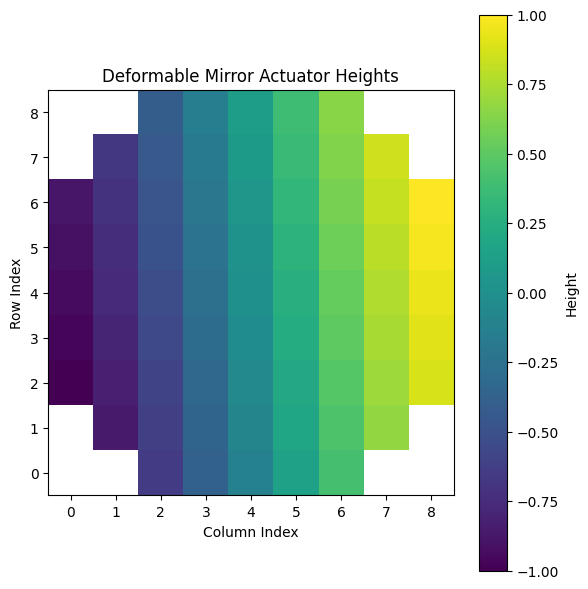

In [4]:
actuator_values = np.linspace(-1, 1, 69)  # Example actuator values
show_deformable_mirror(actuator_values)

In [30]:
ZernikeObj=zernlib.Zernikes(max_zernike_radial_number=9,Nx=9,Ny=9,aperture_diameter_in_m=3e-3,SLM_pixel_size_in_um=1)

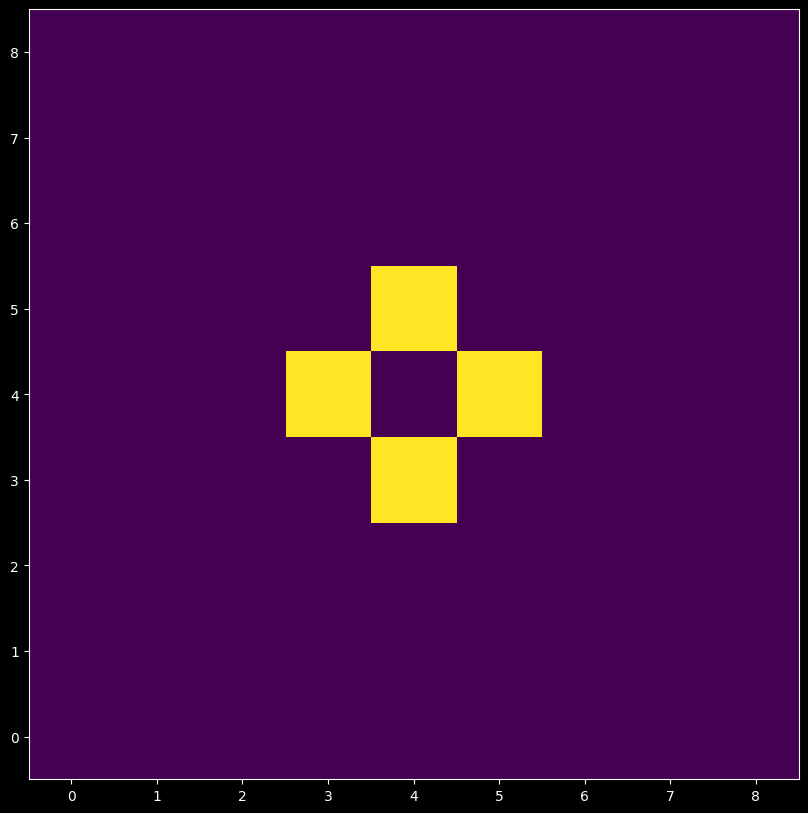

In [39]:
ZernikeObj.zern_coefs[4]=10
ZernikeObj.make_zernike_fields()
plt.imshow(np.angle(ZernikeObj.field)/np.pi,origin='lower')

Angle limit for pixel  27.54854595948414


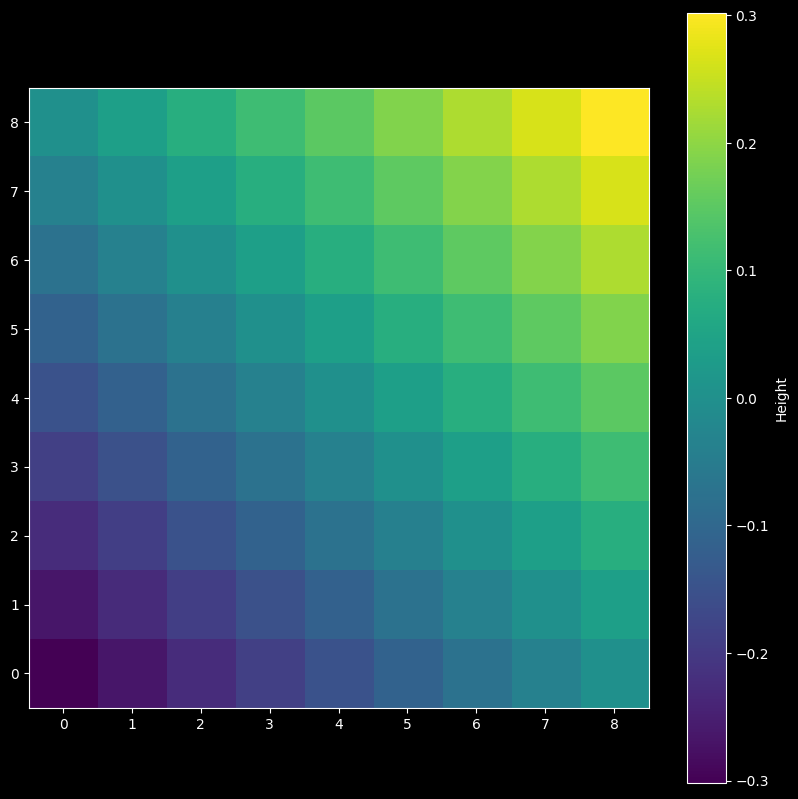

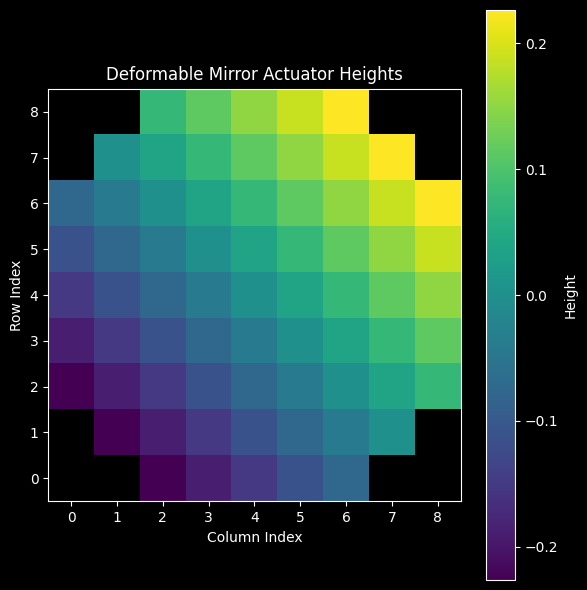

In [24]:
Nx=9
Ny=9
focalLen=1e-6
wavelength=925e-9
pixelSize=1e-6
xmin=(((-(Nx-1))/2.0))*pixelSize
xmax=(((Nx-1)/2.0))*pixelSize
ymin=(((-(Ny-1))/2.0))*pixelSize
ymax=(((Ny-1)/2.0))*pixelSize
xArr=np.linspace(xmin,xmax,Nx)
yArr=np.linspace(ymin,ymax,Ny)

XGrid,YGrid=np.meshgrid(xArr,yArr)
LensProf=OpticOp.LensPhaseProf(focalLen,wavelength,XGrid,YGrid)
TiltProf=OpticOp.TiltPhaseProf(1,1,wavelength,XGrid,YGrid)

phaseProf=TiltProf
plt.figure()
im=plt.imshow(np.angle(phaseProf)/np.pi,origin='lower')#,vmin=-1,vmax=1)
plt.colorbar(im, label="Height")

Arr=grid_to_actuator_array(np.angle(phaseProf)/np.pi)
show_deformable_mirror(Arr)


# config the workspace

In [1]:
from Lab_Equipment.Config import config 

Current Directory: h:\MPLCProject
This is a Windows system.


# load all libs

In [ ]:
# Python Libs
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]


# NOTE
# when debuging multiprocesses code you can put thing in the queue and the look at it from outside the thread using 
# flag =digholoThread.digholo_queue.get_nowait()
# print(flag)
import TimeTagger
import Lab_Equipment.TimeTagger.TimeTaggerFunction as TimetaggerFunc
import Lab_Equipment.TimeTagger.TimeTaggerLiveWindow as TTLiveWindow
import Lab_Equipment.DeformableMirror as DeformMirror_lib




In [ ]:
# This is needed to Qt stuff (I think()
# %pylab inline
%gui qt5

%load_ext autoreload
#Config File
%aimport Lab_Equipment.Config.config

%aimport Lab_Equipment.TimeTagger.TimeTaggerFunction 
%aimport Lab_Equipment.TimeTagger.TimeTaggerLiveWindow
%aimport Lab_Equipment.DeformableMirror
%autoreload 1

# Launch a Deformable mirror

In [ ]:
deformMirror=DeformMirror_lib.DeformanbleMirror_Obj()

# Need to delete the object when you are finished with it to clean up the thread

In [13]:
del TTDispThread

Cleaning up resources...


# Launch the live Feed

In [4]:
TTDispThread=TTLiveWindow.TimeTaggerLiveDisplayThread()

# functions for you to use

In [5]:
TTDispThread.SetTriggerLevel(1,0.001)
TTDispThread.SetTriggerLevel(2,0.001)
TTDispThread.SetAvgNumOfCountMeas(100)

TTDispThread.SetCountTime(1)
TTDispThread.SetBinWidth(1000)
TTDispThread.SetSetChanneL(1,3)
TTDispThread.SetDisplayNormalisedValues(False)



Trigger Level was set to : 0.0010000000474974513
Trigger Level was set to : 0.0010000000474974513
Channel_idx need to be either 0 or 1


In [12]:
TTDispThread.SetSetChanneL(1,3)

# if you want to release the time tagger from the live feed just pause the live feed. You can reconnect by unpausing it.

In [80]:
TTDispThread.SetPausePlayTimeTagger()

TimeTagger was released from the thread run function again to reconnect


# If you want to take some measurments in the notebook you can use the lines below

In [82]:
tagger=TimeTagger.createTimeTagger()

In [85]:
binWidth=1000
measurementChannels=[1,2]
countingTime=5
numberSamples=1
coinData=TimetaggerFunc.getCoincidences(tagger,measurementChannels,binWidth,countingTime)


channel1Counts=coinData.channel1_counts
channel2Counts=coinData.channel2_counts
coincidences=coinData.coincidences
contrast=coinData.contrast_CAR

In [86]:
print(channel1Counts,channel2Counts) 


0 0


In [88]:
TimeTagger.freeTimeTagger(tagger)

False

# Launch a Deformable mirror

In [ ]:
deformMirror=DeformMirror_lib.DeformanbleMirror_Obj()